## NDLIB Network Diffusion Library
https://ndlib.readthedocs.io/en/latest/tutorial.html

The SIR model over a network

In [1]:
import networkx as nx
import ndlib.models.epidemics as ep

from bokeh.io import output_notebook, show
from ndlib.viz.bokeh.DiffusionTrend import DiffusionTrend
from ndlib.viz.bokeh.DiffusionPrevalence import DiffusionPrevalence
import matplotlib.pyplot as plt
from ipywidgets import interact
output_notebook()

Loading BokehJS ...

## Fun with networks

The Erdos-Renyi method for generating a graph with $n$ nodes and a success probability of $p$ edges per node.

In [2]:
def drawg(n=50,m=0.2):
    g = nx.erdos_renyi_graph(n, m)
    nx.draw(g)
    plt.show()

So for example if we have 4 nodes and a success probability of 1 we'll have all possible edges (six in this case).  More generally the number of possible edges is $\frac{n(n-1)}{2}\cdot p$.

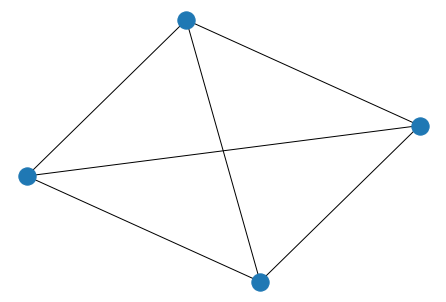

In [3]:
drawg(4,1)

Here is G(10,0.2). Note this network can look quite different each time because it's created at random. 

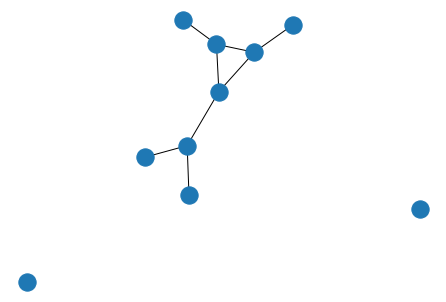

In [4]:
drawg(10,0.2)

See how the randomly generated graphs change as we change parameters. The $n$ controls the number of nodes while the $m$ the number of edges per node.

In [5]:
interact(drawg, n=(10,50,5), m=(0.025,1,0.025));

interactive(children=(IntSlider(value=50, description='n', max=50, min=10, step=5), FloatSlider(value=0.2, des…

## The SIR model over a network

We start with a network of 1000 nodes.

In [6]:
g = nx.erdos_renyi_graph(1000, 0.1)

## The SIR model over a network
Using the NDlib library

In [7]:
# Model Selection
model = ep.SIRModel(g)

In [8]:
import ndlib.models.ModelConfig as mc

# Model Configuration
config = mc.Configuration()
config.add_model_parameter('beta', 0.001)
config.add_model_parameter('gamma', 0.01)
config.add_model_parameter("fraction_infected", 0.05)
model.set_initial_status(config)

In [9]:
# Simulation
iterations = model.iteration_bunch(200)
trends = model.build_trends(iterations)

In [10]:
viz = DiffusionTrend(model, trends)
p = viz.plot(width=400, height=400)
show(p)

In [11]:
viz2 = DiffusionPrevalence(model, trends)
p2 = viz2.plot(width=400, height=400)
show(p2)

In [12]:
from ndlib.viz.bokeh.MultiPlot import MultiPlot
vm = MultiPlot()
vm.add_plot(p)
vm.add_plot(p2)
m = vm.plot()
show(m)

In [13]:
import ndlib.models.epidemics as ep

vm = MultiPlot()
vm.add_plot(p)

# SIS
sis_model = ep.SISModel(g)
config = mc.Configuration()
config.add_model_parameter('beta', 0.001)
config.add_model_parameter('lambda', 0.01)
config.add_model_parameter("fraction_infected", 0.05)
sis_model.set_initial_status(config)
iterations = sis_model.iteration_bunch(200)
trends = sis_model.build_trends(iterations)

viz = DiffusionTrend(sis_model, trends)
p3 = viz.plot(width=400, height=400)
vm.add_plot(p3)

# SI
si_model = ep.SIModel(g)
config = mc.Configuration()
config.add_model_parameter('beta', 0.001)
config.add_model_parameter("fraction_infected", 0.05)
si_model.set_initial_status(config)
iterations = si_model.iteration_bunch(200)
trends = si_model.build_trends(iterations)

viz = DiffusionTrend(si_model, trends)
p4 = viz.plot(width=400, height=400)
vm.add_plot(p4)

# Threshold
th_model = ep.ThresholdModel(g)
config = mc.Configuration()

# Set individual node threshold
threshold = 0.40
for n in g.nodes():
        config.add_node_configuration("threshold", n, threshold)

config.add_model_parameter("fraction_infected", 0.30)
th_model.set_initial_status(config)
iterations = th_model.iteration_bunch(60)
trends = th_model.build_trends(iterations)

viz = DiffusionTrend(th_model, trends)
p5 = viz.plot(width=400, height=400)
vm.add_plot(p5)

m = vm.plot()
show(m)